# 2. 사전 훈련된 컨브넷 사용하기


## 사전 훈련된 네트워크(pretrained network)

* 작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 매우 효과적인 방법은, **사전 훈련된 네트워크를 사용**하는 것이다.
    * 사전 훈련된 네트워크(pretrained network) : 대량의 데이터셋에서 미리 훈련되어 저장된 네트워크
    * 사전 훈련된 네트워크에서 학습된 특성을 다른 문제에 적용하기 (딥러닝의 유연성)
* **ImageNet 데이터셋에서 훈련된 대규모 컨브넷을 사용하자.**
    * 강아지와 고양이 등의 많은 동물들을 포함
* **+) VGG16 구조를 사용한다.**
    * ImageNet 데이터셋에 널리 사용되는 간단한 컨브넷 구조

## 사전 훈련된 네트워크를 사용하는 방법
1. 특성 추출(feature extraction)
2. 미세 조정(fine tuning)

## 1) 특성 추출

### 정의

* **사전에 학습된 네트워크의 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 뽑아내는 것**을 말한다.
    * 이런 특성을 사용하여, 새로운 분류기를 처음부터 훈련한다.
    
### 합성곱 기반 층을 재사용하기

* 컨브넷의 구조
    * 연속된 합성곱과 풀링 층(= 합성곱 기반 층, convolutional base) + 완전 연결 분류기
    * => **새로운 데이터를 사전 훈련된 네트워크의 합성곱 기반 층에 통과**시키고, **그 출력으로 새로운 분류기를 훈련**한다.
* 합성곱 기반 층만 재사용!
    * 분류기에서 학습한 표현은 모델이 훈련된 클래스 집합에 특화되어 있으므로
    * 또한, 이미지에 있는 개체의 위치 정보는 분류기에 존재하지 않는다. (합성곱 기반 층에 존재함)
* 특정 합성곱 층에서 추출한 표현의 일반성(& 재사용성) 수준은, 모델에 있는 층의 깊이에 달려 있다.
    * 하위 층: 에지, 색깔, 질감 등 지역적이고 매우 일반적인 특성 맵을 추출
    * ~> 상위 층: '강아지 눈'이나 '고양이 귀'와 같은 좀 더 추상적인 개념을 추출
    * 새로운 데이터셋이 원본 모델이 훈련한 데이터셋과 많이 다르다면, 전체 합성곱 기반 층을 사용하기보다는 모델의 하위 층 몇 개만 특성 추출에 사용하는 것이 좋음
    
### 정리하자면,

1.  **ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반 층**을 사용해 강아지와 고양이 이미지에서 유용한 특성을 추출하자.
    * VGG16 모델은 `keras.applications` 모듈에서 import 가능
    
2. **추출한 특성으로 강아지 vs. 고양이 분류기를 훈련**하자.

In [1]:
# VGG16 합성곱 기반 층 만들기

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',  # 모델을 초기화할 가중치 체크포인트를 지정
                 include_top=False,  # 네트워크의 최상위 완전 연결 분류기를 포함(default)할지 말지 결정
                 input_shape=(150, 150, 3))  # 네트워크에 주입할 이미지 텐서의 크기 (선택사항 - 지정하지 않을 경우, 네트워크는 어떤 크기의 입력도 처리 가능)

Using TensorFlow backend.
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype

/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shchoi/Documents/Today-I-Learned/ML-DL/venv/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("q

58892288/58889256 [==============================] - 15s 0us/step




In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### 완전 연결 층을 놓는 두 가지 방법

1. 새로운 데이터셋에서 합성곱 기반 층을 실행하고, 출력을 numpy array로 디스크에 저장하여 이를 독립된 완전 연결 분류기의 입력으로 사용하기
    * 모든 입력 이미지에 대해 합성곱 기반 층을 한 번만 실행하면 됨
        * 빠르고, 적은 비용
        * but 데이터 증식 사용 불가
    

2. 준비한 모델(conv_base) 위에 Dense 층을 쌓아 확장 -> 입력 데이터에서 end-to-end로 전체 모델 실행하기
    * 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반 층을 통과
        * 데이터 증식 사용 가능
        * but 비용 증가

In [10]:
# 첫 번째 방식 : 데이터 증식을 사용하지 않는 빠른 특성 추출
# 사전 훈련된 합성곱 기반 층을 사용한 특성 추출하기 

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20


def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)  # conv_base.predict : 이미지에서 특성 추출
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count :
            break
    return features, labels


train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
print(train_features)
print('*****')
print(train_labels)

[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.30939186e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.71357656e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.24061942e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.47217941e-01 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 1.08376312e+00 ... 0.00000000e+00
    7.87764847e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 7.96747327e-01 ... 8.09194863e-01
    1.34273434e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 6.61687493e-01 ... 1.15642560e+00
    1.62798071e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 8.48617911e-01 ... 4.70106900e-01
    1.49155354e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 1.19635439e+00 ... 0.00000000e+00
    4.56434488e-01 0.00000000e+00]
   [7.83080608e-02 0.00000000e+00 1.41749144e+00 ... 0.00000000e+00
 

In [12]:
print(train_features.shape)
print(train_labels.shape)

(2000, 4, 4, 512)
(2000,)


In [13]:
# 완전 연결 분류기에 주입하기 위해 (samples, 8192) 크기로 펼치기

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [14]:
print(train_features.shape)
print(validation_features.shape)
print(test_features.shape)

(2000, 8192)
(1000, 8192)
(1000, 8192)


In [15]:
# 완전 연결 분류기를 정의하고 훈련하기

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6278 - acc: 0.6670 - val_loss: 0.4642 - val_acc: 0.8250
Epoch 2/30
2000/2000 [==============================] - 2s 894us/step - loss: 0.4467 - acc: 0.7925 - val_loss: 0.3787 - val_acc: 0.8500
Epoch 3/30
2000/2000 [==============================] - 2s 894us/step - loss: 0.3720 - acc: 0.8395 - val_loss: 0.3455 - val_acc: 0.8510
Epoch 4/30
2000/2000 [==============================] - 2s 870us/step - loss: 0.3272 - acc: 0.8655 - val_loss: 0.3079 - val_acc: 0.8810
Epoch 5/30
2000/2000 [==============================] - 2s 877us/step - loss: 0.2924 - acc: 0.8740 - val_loss: 0.2922 - val_acc: 0.8770
Epoch 6/30
2000/2000 [==============================] - 2s 857us

In [17]:
import matplotlib.pyplot as plt

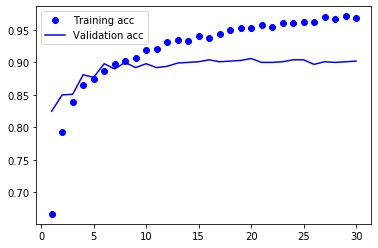

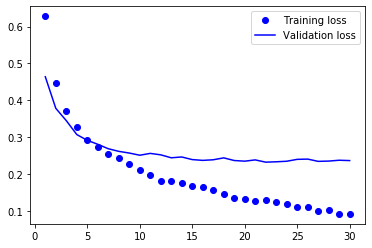

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

### 그래프 해석

* 약 90%의 검증 정확도에 도달
* 이전의 작은 모델보다는 향상되었으나, 
* 많은 비율로 드롭아웃했음에도 불구하고 훈련을 시작하면서 거의 바로 과대적합됨
    * 과대적합을 막기 위해 필수적인 데이터 증식을 사용하지 않았기 때문

### 데이터 증식을 사용한 특성 추출

* 훨씬 느리고 비용이 많이 들지만,
* 훈련하는 동안 데이터 증식 기법을 사용할 수 있다.
    * 과대적합을 줄일 수 있음
* conv_base 모델을 확장하고, 입력 데이터를 사용하여 end-to-end로 실행한다.
* 연산 비용이 크므로, GPU를 사용할 수 있을 때 시도해야 한다.
    * 생략

## 2) 미세 조정(fine-tuning)

### 정의

* 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고, 모델에 새로 추가한 층과 함께 훈련하는 것을 말한다.
    * 특성 추출을 보완
    * 여기에서 새로 추가된 층은 완전 연결 분류기
* 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에, 미세 조정이라고 부른다.

### 네트워크를 미세 조정하는 단계

1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가

2. 기반 네트워크를 동결

3. 새로 추가한 네트워크를 훈련

**4. 기반 네트워크에서, 일부 층의 동결을 해제**

**5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련**

In [19]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### 미세 조정 대상

* block5_conv1, block5_conv2, block5_conv3
    * 이전 층들은 동결됨
    * 여기에서는 **구체적인 특성을 인코딩하는 상위 층을 미세 조정하는 것이 효과적**

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_ste)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [24]:
# 특정 층까지 모든 층 동결하기

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [25]:
# 모델 미세 조정하기

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100


ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (20, 150, 150, 3)